<a href="https://colab.research.google.com/github/vishaln94/Digital-Advertising-Analytics/blob/master/Predictive_Analytics_Challenge_Vishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predictive Analytics Challange - Russian Facebook Ads**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV

In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/rusdata_utf8.csv'
df = pd.read_csv(csvfile, encoding='latin1')

# Data Exploration and Preliminary Analysis on Features

Let's first start by building a correlation plot among our continuous variables, to determine if there is a variable that has a strong relation with clicks. We can get rid of the variables that we don't want to use. 

In [0]:
df2 = df.iloc[:,6:32]
del df2['medium_bin']
del df2['text']
del df2['landpage']
del df2['impress']
del df2['ctr']
del df2['enddate']
del df2['campaignlength_old_dontuse']

In [0]:
corrplot = df2.corr()
corrplot.style.background_gradient(cmap='coolwarm').set_precision(2)

,clicks,spend,clength,toxic,sevtoxic,idattack,insult,profane,threat,sexexp,flirt,a_author,a_commentor,incoh,inflam,obscene,target_count
clicks,1,0.65,-0.003,-0.073,-0.058,-0.084,-0.084,-0.071,-0.071,-0.049,-0.044,0.025,0.053,-0.054,-0.021,-0.011,0.11
spend,0.65,1,0.28,-0.034,-0.037,-0.019,-0.054,-0.053,-0.046,-0.067,-0.084,-0.039,0.023,0.0039,0.022,-0.055,-0.011
clength,-0.003,0.28,1,-0.018,-0.028,0.0043,-0.033,-0.035,0.001,-0.06,-0.063,-0.06,-0.039,0.01,0.035,-0.017,0.0092
toxic,-0.073,-0.034,-0.018,1,0.94,0.87,0.95,0.9,0.58,0.5,0.3,0.0062,0.00044,0.047,0.65,0.27,-0.15
sevtoxic,-0.058,-0.037,-0.028,0.94,1,0.83,0.93,0.92,0.62,0.58,0.37,-0.01,-0.043,0.1,0.57,0.32,-0.13
idattack,-0.084,-0.019,0.0043,0.87,0.83,1,0.87,0.75,0.48,0.39,0.25,-0.076,-0.11,0.039,0.68,0.14,-0.13
insult,-0.084,-0.054,-0.033,0.95,0.93,0.87,1,0.94,0.56,0.54,0.36,0.0042,-0.05,0.052,0.64,0.31,-0.17
profane,-0.071,-0.053,-0.035,0.9,0.92,0.75,0.94,1,0.59,0.65,0.4,-0.0029,-0.07,0.057,0.57,0.41,-0.17
threat,-0.071,-0.046,0.001,0.58,0.62,0.48,0.56,0.59,1,0.45,0.37,-0.15,-0.2,0.15,0.36,0.11,-0.2
sexexp,-0.049,-0.067,-0.06,0.5,0.58,0.39,0.54,0.65,0.45,1,0.63,0.061,-0.094,0.1,0.26,0.32,-0.18


Based off the correlation plot above, we can't seem to notice a strong relationship between clicks and some of our continuous variables. Now let's build some plots to see if we can detect a linear or non-linear relationship betwee clicks and a few of our numerical variables. 

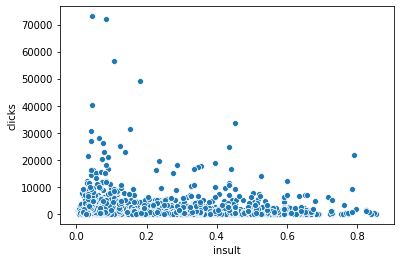

In [0]:
sns.scatterplot(x="insult", y="clicks", data=df)

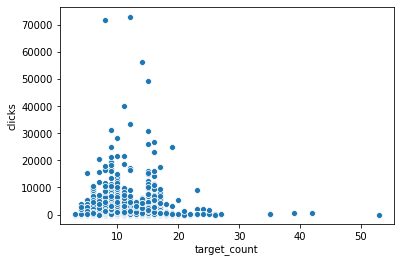

In [0]:
sns.scatterplot(x="target_count", y="clicks", data=df)

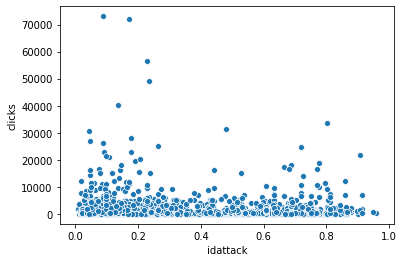

In [0]:
sns.scatterplot(x="idattack", y="clicks", data=df)

The scatterplots above take a few of the continuous variables and plot them against clicks. Based on the plots, the counts seem to cluster around where the scores for these variables are relatively now. We can't seem to truly determine from the scatterplots if there is a true linear or non-linear relationship between clicks and our variables, so let's take a look at some others. 

Do election days make a difference in when people are clicking on ads?

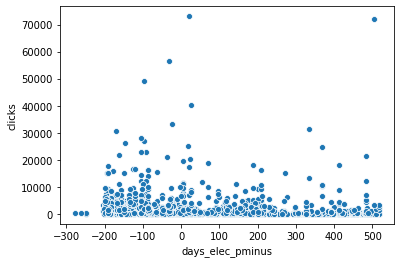

In [0]:
sns.scatterplot(x="days_elec_pminus", y="clicks", data=df)

Based on the scatterplot, it seems like more clicks are being generated when election time is nearing or a little past it, however it's tough to determine a relationship. 

## Feature Engineering 

-   Developing new variables from our data that can help support a hypothesis



Hypothesis: There is an effect in the occurences of a presidential debates, and a user's engagement on social media posts. 


In order to test this, lets create 3 new columns to calculate the days to and days since each presidential debate. 

But first let's clean up our dataset by getting rid of columns we don't want.

In [0]:
del df['impress']
del df['ctr']
del df['campaignlength_old_dontuse']
del df['clength']

Next, we can use the debate days to calculate the difference between the start date and the debate day for all 3 debates. 

In [0]:
date1 = pd.to_datetime(df['launched '])
Debate1 = pd.to_datetime('2016-09-26')
DaystoDebate1 = Debate1-date1
DaysToOrSinceDebate1 = DaystoDebate1.dt.days


date2 = pd.to_datetime(df['launched '])
Debate2 = pd.to_datetime('2016-10-09')
DaystoDebate2 = Debate2-date2
DaysToOrSinceDebate2 = DaystoDebate2.dt.days

date3 = pd.to_datetime(df['launched '])
Debate3 = pd.to_datetime('2016-10-19')
DaystoDebate3 = Debate3-date3
DaysToOrSinceDebate3 = DaystoDebate3.dt.days


In [0]:
df.insert(6, 'Days to/Since Debate 1', DaysToOrSinceDebate1)

In [0]:
df.insert(7, 'Days to/Since Debate 2', DaysToOrSinceDebate2)

In [0]:
df.insert(8, 'Days to/Since Debate 3', DaysToOrSinceDebate3)

Now let's see if there was a relationship between any of our debate days and clicks. 

Our data has several categorical variables that can be used for this analysis. One way of grouping them is to see if they belong to a particular commuity. 

A wordcloud can provide us with some insight into the most frequent words that are mentioned in the text of an ad. By finding out the most common words, we might be able to group some of the targets together. 

In [0]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
df['text'] = df.text.astype(str)

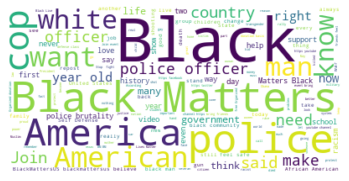

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(["people", "will", "us", "one",'time'])
text = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud shows that the most common terms are associated with a community of people, such as black, the police force, or American. The following code groups people into 4 categories:

1. Black/African American 
2. American Patriots
3. People against police brutality
4. Muslim community

First, let's group together individuals that have shared interests in Black/African American communities

In [0]:
df3 = df[[x for x in df.columns if "Black" in x]]
df4 = df3.sum(axis = 1, skipna = True)

df5 = df[[x for x in df.columns if "African" in x]]
df6 = df5.sum(axis = 1, skipna = True)

df7 = df4 + df6
df7 = pd.DataFrame(df7)

In [0]:
df['Targeted Group: African Americans'] = df7

Now let's repeat the process for American patriots.

In [0]:
Patriot = df[[x for x in df.columns if "Patr" in x]]
Patriot2 = Patriot.sum(axis = 1, skipna = True)

Patriot3 = df[[x for x in df.columns if "patr" in x]]
Patriot4 = Patriot3.sum(axis = 1, skipna = True)

Patriot5 = Patriot2 + Patriot4
Patriot5 = pd.DataFrame(Patriot5)

In [0]:
df['Targeted Group: Patriots'] = Patriot5

People who are against Police brutality

In [0]:
Brut = df[[x for x in df.columns if "Brut" in x]]
Brut2 = Brut.sum(axis = 1, skipna = True)

brut = df[[x for x in df.columns if "brut" in x]]
brut2 = brut.sum(axis = 1, skipna = True)



In [0]:
Watch = df[[x for x in df.columns if "watch" in x]]
Watch = Watch.sum(axis = 1, skipna = True)

block = df[[x for x in df.columns if "block" in x]]
block = block.sum(axis = 1, skipna = True)

Block = df[[x for x in df.columns if "Block" in x]]
Block = Block.sum(axis = 1, skipna = True)


PoliceBrutality= Brut2 + brut2 + Watch + block + Block
PoliceBrutality = pd.DataFrame(PoliceBrutality)

In [0]:
df['Targeted Group: Police Brutality'] = PoliceBrutality

Even though we can't directly see the Muslim community in our wordcloud, let's look at the Muslim community as well. 

In [0]:
mus = df[[x for x in df.columns if "muslim" in x]]
mus = mus.sum(axis = 1, skipna = True)

Mus = df[[x for x in df.columns if "Muslim" in x]]
Mus = Mus.sum(axis = 1, skipna = True)

Islam = df[[x for x in df.columns if "Islam" in x]]
Islam = Islam.sum(axis = 1, skipna = True)

IslamInterest = mus + Mus + Islam
IslamInterest = pd.DataFrame(IslamInterest)

In [0]:
df['Targeted Group: Muslims'] = IslamInterest

In [0]:
df.to_csv("RussianFacebookAds.csv",index=False)

Now that we have our debate days and grouped targets, we can load it into Datarobot for model selection. 